## Case Study Intro Improved

1. Want to include Status as X,  (done!)
   1. But before that, i have to "encode" or change string to number, and I will teach two ways in theory, and show you one way in practice
2. Cross validation 
   1. you may get lucky or unlucky with your training set?
3. Grid search
   1. how to find the best parameters of a model
   2. If your computer is strong, i think you can do like 5
   3. But usually 3 parameters are enough - the important one
4. Feature importance (done!)
   1. After I got the model, and the prediction, how do i know which features ARE most important for prediction?

Course plan:  Intro -> Numpy, Pandas, Skearn -> (start project) -> More case studies -> Deploy

### Life Expectancy

In [216]:
#Caution: If you don't understand my code, it's fine!  
#I just want you to get a feeling what you will achieve at the end

#if you want to create new cell, press B
#if you want to delete cell, press D D

#if you want to conver a code cell to markdown cell, press M

### 1. Load the data (ETL)

In [217]:
#ETC - Extract - Transform - Load is a very time-consuming tasks

#to load the data, there are many ways
#most common is to use a library called Pandas
#Pandas is like Excel

#first thing first, import pandas

import pandas as pd

#if you want to run the code, press Shift-Enter

In [218]:
#read the csv file
#pandas called its data "DataFrame"
df = pd.read_csv('Life_Expectancy_Data.csv')

#pd.read

In [219]:
#let's take a look at some rows.....to make sense of the data
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


I gonna take notes the problem of my dataset
- Status need to be integers
- I don't know what is adult mortality
- I also don't know what is infant deaths 

I also learn something
- Life expectancy is my label --> the thing I want to predict

### 2. Exploratory Data Analysis (EDA)

In [220]:
#EDA = Visualization

#the first command you wanna do right away is
df.describe()

#describe does NOT describe discrete variable
#describe ONLY gives us the statistics of continuous variable

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [221]:
#tells you the data type
df.info()

#we usually like float and int, we DON'T LIKE object.  Usually object means strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [222]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [223]:
df['Status'].count()

2938

In [224]:
#how many rows i have?
df.shape  #with no ()  ==> 2938 rows, and 22 columns

(2938, 22)

In [225]:
#why shape has no () but count and unique has ()
#here anything with () is called function
#anything without () is called attributes

In [226]:
#I want to explore more, in form of graphs!

#how?

#many ways

#I gonna use seaborn - which is a refined version of matplotlib

import seaborn as sns

/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

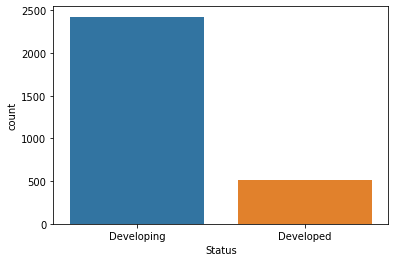

In [227]:
sns.countplot(df['Status'])  #mostly for visualizing discrete features

In [228]:
df = df.rename(
    columns = {'Life expectancy ': 'life-exp'}
)

df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

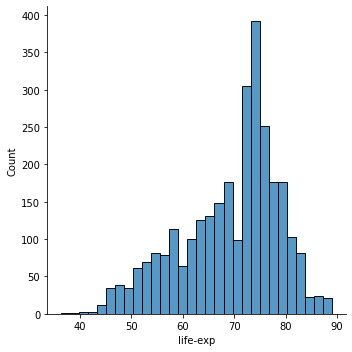

In [229]:
#I want to visualize continuous features, e.g., life-exp
sns.displot(df['life-exp'])  #displot vs. distplot

In [230]:
##what if I want to compare two variables, maybe feature vs. label

#if your feature is discrete, use bar graph

#if your feature is continuous, use scatter plot

In [231]:
df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [232]:
print(sns.__version__)

0.11.2


<AxesSubplot:xlabel='Status', ylabel='life-exp'>

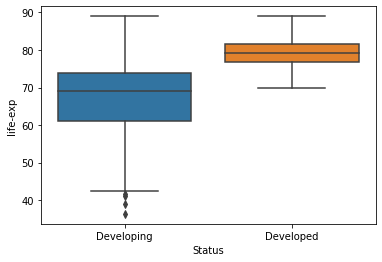

In [233]:
#if my feature is Status - discrete, to see whether Status has an impact, we use bar graph
#btw, x is feature, y means labels  - this is universal definition
sns.boxplot(x = df['Status'], y = df['life-exp'])

In [234]:
#task 1: can you rename thinness 1-19 for me
df.rename(columns = 
    {
        ' thinness  1-19 years': 'thin19',
        ' BMI ': 'bmi'
    },
    inplace=True
)

In [235]:
df.columns

Index(['Country', 'Year', 'Status', 'life-exp', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'bmi', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 'thin19',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<AxesSubplot:xlabel='income', ylabel='life-exp'>

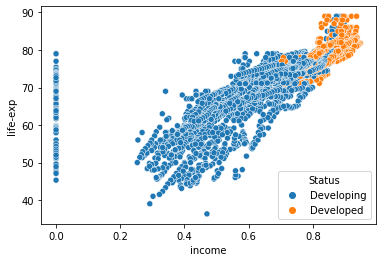

In [236]:
#please plot a scatterplot between income and life-exp, with status as hue

#1. rename
df.rename(columns = {'Income composition of resources': 'income'}, inplace=True)

#2. scatterplot
sns.scatterplot(x = df['income'], y = df['life-exp'], hue=df['Status'])

<AxesSubplot:xlabel='thin19', ylabel='life-exp'>

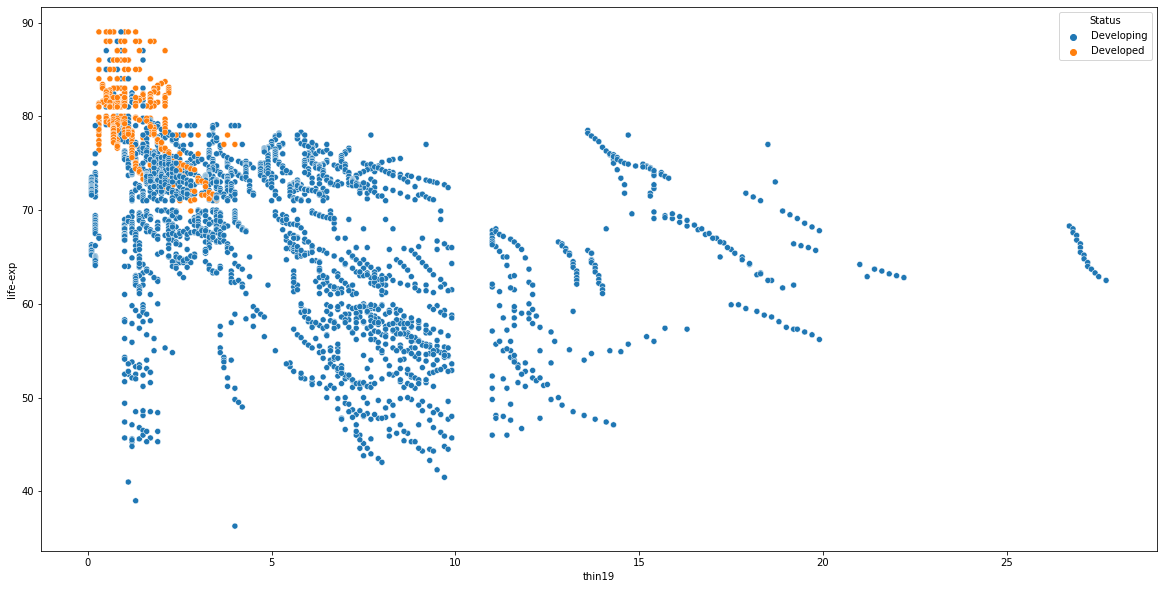

In [237]:
#if my feature is continuous, e.g., to see whether thinness vs. lifeexp 
import matplotlib.pyplot as plt
#seaborn is built inside matplotlib
plt.figure(figsize=(20, 10))
# plt.savefig("chaky.jpg")
sns.scatterplot(x = df['thin19'], y = df['life-exp'], hue = df['Status'])

<AxesSubplot:>

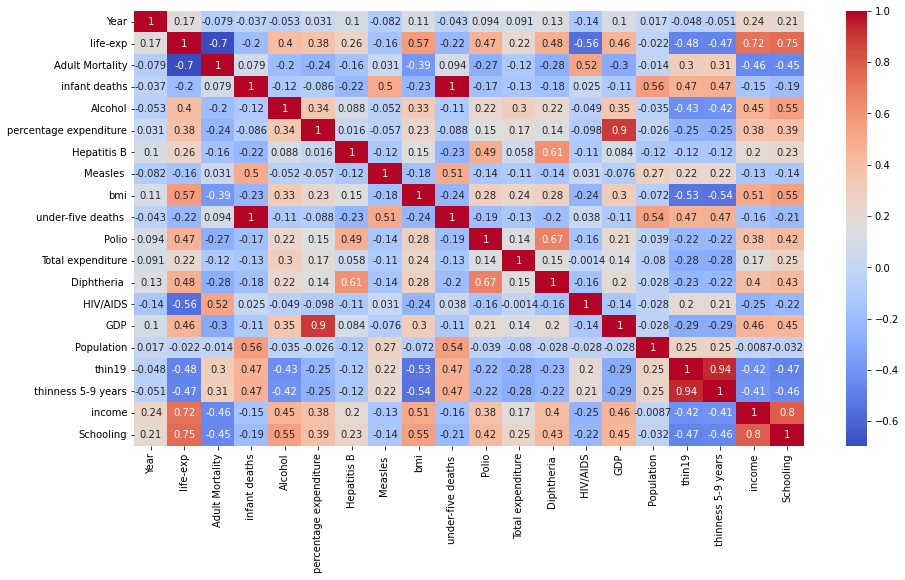

In [238]:
##correlation matrix
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") #you can change using colormap

#this df.corr() only tells you correlation between continuous variable
#this df.corr() IGNORE df['Status']

#correlation must be between two continuous variable
#we learn that negative or positive correlation, we can just take absolute
#near 1 means strong, near 0 means weak
#negative?  - if one goes up, another goes down

In [239]:
#sns.pairplot(df)

### 3. Preprocessing / Cleaning
- missing values
- create new columns - feature engineering
  - E.g., column called stock price, i can feature engineer a new column called MACD
- convert string to integers

In [240]:
#let's focus on missing values
df.isna().sum()

Country                     0
Year                        0
Status                      0
life-exp                   10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
bmi                        34
under-five deaths           0
Polio                      19
Total expenditure         226
Diphtheria                 19
 HIV/AIDS                   0
GDP                       448
Population                652
thin19                     34
 thinness 5-9 years        34
income                    167
Schooling                 163
dtype: int64

0.6275510645976182 0.677


(1, 2, 3, 4, 100)

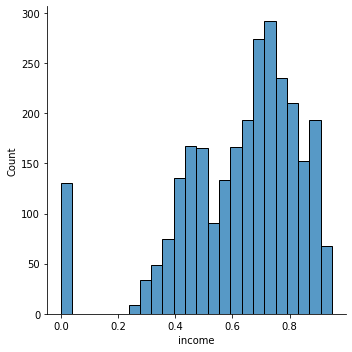

In [241]:
#to fix income,
#we can fill with (1) mean? (2) median? (3) 0
#Case 1: we fill mean/median when the distribution is normal 
#Case 2: we fill median otherwise
#Case 3: we fill 0 if 0 is common case
sns.displot(df['income'])

print(df['income'].mean(), df['income'].median())

df['income'].fillna(df['income'].median(), inplace=True)

df['income'].isna().sum()  #this should be 0!

1, 2, 3, 4, 100     #take the mean = 22
                    #take the median = 3

12.3 11.992792792792793


0

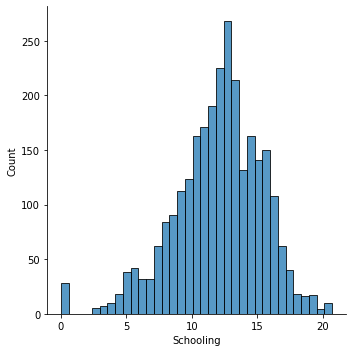

In [242]:
sns.displot(df['Schooling'])

print(df['Schooling'].median(), df['Schooling'].mean())

#fillna for me
df['Schooling'].fillna(df['Schooling'].median(), inplace=True)

df['Schooling'].isna().sum()

In [243]:
df.isna().sum()

Country                     0
Year                        0
Status                      0
life-exp                   10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
bmi                        34
under-five deaths           0
Polio                      19
Total expenditure         226
Diphtheria                 19
 HIV/AIDS                   0
GDP                       448
Population                652
thin19                     34
 thinness 5-9 years        34
income                      0
Schooling                   0
dtype: int64

/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Country                     0
Year                        0
Status                      0
life-exp                    0
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
bmi                        34
under-five deaths           0
Polio                      19
Total expenditure         226
Diphtheria                 19
 HIV/AIDS                   0
GDP                       448
Population                652
thin19                     34
 thinness 5-9 years        34
income                      0
Schooling                   0
dtype: int64

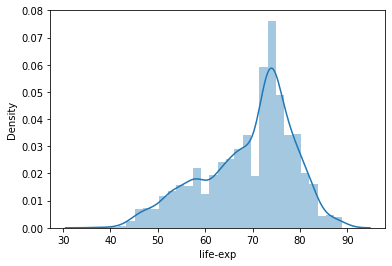

In [244]:
#check life-exp and fillna
sns.distplot(df['life-exp'])

df['life-exp'].median(), df['life-exp'].mean()

df['life-exp'].fillna(df['life-exp'].median(), inplace=True)

df.isna().sum()

/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='life-exp', ylabel='Density'>

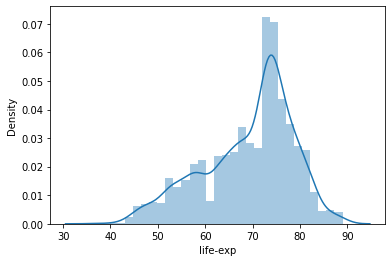

In [245]:
sns.distplot(df['life-exp'])


In [246]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

#### Label Encoding

In [247]:
#import the libraries to do label encoding
from sklearn.preprocessing import LabelEncoder

#load the class
le = LabelEncoder()

#transform
df['Status_Encoded'] = le.fit_transform(df['Status'])

#print again
df['Status_Encoded'].unique()



array([1, 0])

In [248]:
#import numpy as np
le.transform(np.array(['Developing', 'Developed']))

array([1, 0])

### 4. Feature Extraction

- I use weight and height to predict obseity
- Weight and height are called *features, X, independent variables, factors*
- Obseity is what we want to predict - is/are called *labels / targets / dependent variables / outcomes*

What do I mean by feature extraction?

- choose columns
- How do we know which feature is good?
  - Correlation analysis with the label - mostly used for continuous features
  - ANOVA or t-test - statistical test to know whether the factor is important - mostly used for discrete features

In [249]:
#i need to say what is X and y

#X means features, which can be more than one
#y means labels, which can also be more than one, but usually one

#if your y is discrete, it's called classification
#if your y is continuous, it's called regression

#I want X as income and schooling
#I want y as life-exp

#change your X
X = df[        ['income', 'Schooling', 'Status_Encoded']        ]

y = df['life-exp']

In [250]:
X.shape, y.shape

((2938, 3), (2938,))

### 5.  Modeling

- Compare different machine learning models and/or hyperparameters
- what do i mean by hyperparameters - parameters of the machine learning models
- Cross-validation
- Grid-search

In [251]:
### 5.1 split the data into two, training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 999)


######VERY IMPORTANT: THIS IS SOMETHING NOT EVERYONE IS CLEAR
#SO I WANT TO BE CLEAR
#++++++YOU MUST SPLIT FIRST, BEFORE any preprocessing, for example, standardization
#if you DON'T DO THIS, you will get "Data leakage"
#data leakage means some knowledge of test set go to train set

#1. import the standardization library
from sklearn.preprocessing import StandardScaler

#2. create the standardization object
sc = StandardScaler()

#3. fit and transform the X_train
X_train = sc.fit_transform(X_train)

#4. transform the X_test (no fitting!!)
X_test  = sc.transform(X_test)

#the common split is 70/30 or 80/20 or 90/10 or even 95/5
#if your 5% is enough "for you"
#if your data is 1B, 5% is 200000, i think enough
#but my experience, i never see 60/40
#usually i see only 80/20 mostly

#the key idea is to use as much data for training, data is very precious

### 5.2 for training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#define more models for comparison

####5.2.1 create the model
lr = LinearRegression()
rf = RandomForestRegressor()

####5.2.2 fit the model - fit means train!!

###we do not fit here!
# lr.fit(X_train, y_train)

#instead we gonna do cross-validation
#1. define how i will divide the training set - SO MANY WAYS
from sklearn.model_selection import KFold  #-->aware there are MANY WAYS - this is NOT the ONLY way
kfold = KFold(n_splits = 5, shuffle=True)

#2. run cross validation

#2.1 create a list of models
models = [lr, rf]
models_names = ["Linear Regression", "Random Forest"]

#2.2 loop each model
from sklearn.model_selection import cross_val_score

for i, model in enumerate(models):
    #do cross-validation
    scores = cross_val_score(model, X_train, y_train, cv = kfold, 
                             scoring="neg_mean_squared_error")
    print("=======Models======> ", models_names[i])
    print("Score: ", scores)
    print("Mean: ", scores.mean())

#fit means "training", "fitting", "modeling"


=======Models======>  Linear Regression
Score:  [-33.26999436 -45.05355172 -44.27806717 -35.72343189 -40.54244133]
Mean:  -39.773497293430246
=======Models======>  Random Forest
Score:  [-21.21948091 -24.14672005 -20.83756672 -21.27530261 -20.32829364]
Mean:  -21.56147278604636


Now we know that RandomForestRegressor() is quite good for me.

Two ways: 
1. Use it directly on test set
2. Or search for the best parameters for RandomForest, using X_train also

#### Grid Search

In [252]:
#search for the best parameters for RandomForest

#USING X_train

In [259]:
#1. import Gridsearch
from sklearn.model_selection import GridSearchCV

#2. define the range of parameters to search
param_grid = {
    'max_depth'   : [5, 10, None],
    'max_features': ['auto', 'log2'],
    'n_estimators': [5, 6, 99, 8, 9, ]
}

#3. define the base model
rf = RandomForestRegressor()

#4. create the gridsearch object
grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=kfold,
                    n_jobs=-1,return_train_score=True,refit=True,
                    scoring="neg_mean_squared_error"
)

#5. run grid search
grid.fit(X_train, y_train)

#after grid.fit, the best model will be returned as grid, so you just grid.predict()
#try grid.best_params_  ==>this will give you the list of best parameters
grid.best_params_


{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 99}

In [254]:
# import numpy as np
# X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], 
#                     [1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])

# kfold = KFold(n_splits = 5, shuffle=True)


In [255]:
# for train_index, test_index in kfold.split(X_train):
#     print(train_index, test_index)

In [256]:
y_test.shape

(588,)

In [257]:
y_train.shape

(2350,)

### 6. Testing / Inference

- test with a separate test set to get "real" accuracy

In [260]:
### test your model on testing set
predicted_y = grid.predict(X_test)

In [261]:
### check the mean squared error (MSE)
import math
###  (  (y1 - y^1)^2 + (y2 - y^2)^2 + ...... (yn - y^n)^2  )  / n
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE: ", mean_squared_error(y_test, predicted_y))
print("MAE: ", mean_absolute_error(y_test, predicted_y))
print("R2 score: ", r2_score(y_test, predicted_y))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predicted_y)))


MSE:  20.036522551569345
MAE:  3.042719882274775
R2 score:  0.7782188055665409
RMSE:  4.4762174379233794


In [ ]:
import numpy as np
real_y = np.array(  [1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3]   )
predicted_y = np.array( [100, 100, 999, 333, 444, 555, 777, 277, 333, 222, 333] )

r2_score(real_y, predicted_y)

-382471.37837837834

In [ ]:
real_y.mean()

1.5454545454545454

In [ ]:
predicted_y = np.array([1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54])
r2_score(real_y, predicted_y)

-4.864864864839724e-05

In [ ]:
predicted_y = np.array([1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3])

r2_score(real_y, predicted_y)


1.0

In [ ]:
#go to monkeytype and then practice, try to get 60 wpm

In [ ]:
predicted_y[:3]

array([1, 1, 1])

In [ ]:
y_test[:3]

375     77.2
1327    81.8
540     48.4
Name: life-exp, dtype: float64

### 6.2 Saving the model for later use

In [ ]:
df.describe()

,Year,life-exp,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,bmi,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thin19,thinness 5-9 years,income,Schooling,Status_Encoded
count,2938.000000,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,...,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.630362,12.009837,0.825732
std,4.613841,9.509115,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,...,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.205140,3.265139,0.379405
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,...,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.504250,10.300000,1.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,1.000000
75%,2012.000000,75.600000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,...,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.772000,14.100000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000


In [ ]:
#import the libary - pickle
import pickle

#save the model
filename = 'lifeexp.pkl' #here pkl does not matter, you can do .chaky
pickle.dump(lr, open(filename, 'wb'))

#load the model
loaded_lr = pickle.load(open(filename, 'rb'))

In [ ]:
#here means
#first row - income = 11, schooling =0.3, and developing
#second row - income = 4, schooling =0.8, and developed
random_data = np.array([  [11, 0.3, 1], [4, 0.8, 0] ])
random_data.shape

(2, 3)

In [ ]:
#try to use the model to predict
#income, schooling, status
#here, our first row get life expectancy of 200, and second row get life expectancy of 106
result = loaded_lr.predict(random_data)
result

array([200.9419539 , 106.99867888])

In [ ]:
11 * 14.04703493 + 0.3 * 1.13483149 + -3.81855373 * 1 + 49.90267397184064

200.94195391884065

#### If you want to know the model equations

In [ ]:
lr.coef_

array([14.04703493,  1.13483149, -3.81855373])

In [ ]:
lr.intercept_

49.90267397184064

Feature Importance

- Why this is important?
- because it explains your model!

In [ ]:
#how do i know which feature is important?

#this is called "feature importance"

#different model has different ways

#for linear regression or regression-based methods, look at "weights" or I mean m

#bigger m means more important, smaller m means less important

lr.coef_

array([14.04703493,  1.13483149, -3.81855373])

<BarContainer object of 3 artists>

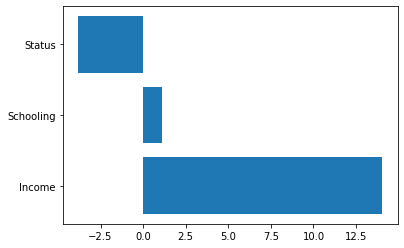

In [ ]:
plt.barh(['Income', 'Schooling', 'Status'], lr.coef_)

### 7. Deploy 

- 1. you need to make an API - how?  ---> best tool is called FastAPI
- 2. you need to host this API somewhere in the internet
  - Free option: Heroku
  - Not free option: AWS EC2,  Google Cloud, Azure ML, Digital Ocean (cloud server)